Imports

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import time
import os
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster.k_means_ import _init_centroids, _labels_inertia
from sklearn.cluster._k_means import _centers_dense
from IPython import display



# Relabel targets so colors match
def relabel(targets, labels):
    inds = [0] + [i for i in range(1,len(targets)) if targets[i] != targets[i-1]] + [len(targets)]
    permute = [Counter(labels[inds[i]: inds[i+1]]).most_common()[0][0] for i in range(len(inds) - 1)]
    return np.choose(targets, permute)

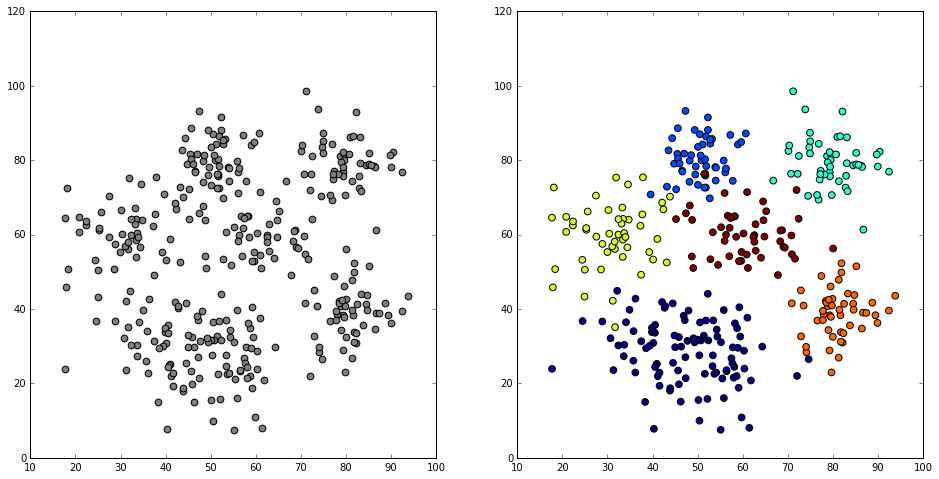

In [2]:
#np.random.seed(121)
distros = [np.random.multivariate_normal([50, 30], [[100, 0], [0,100]], 100),
           np.random.multivariate_normal([50, 80], [[30, 0], [0, 30]], 50),
           np.random.multivariate_normal([80, 80], [[30, 0], [0, 30]], 50),
           np.random.multivariate_normal([30, 60], [[40, 0], [0, 70]], 50),
           np.random.multivariate_normal([80, 40], [[25, 0], [0, 40]], 50),
           np.random.multivariate_normal([60, 60], [[60, 0], [0, 40]], 50),
          ]

points = np.concatenate(distros)
targets = np.concatenate([[i] * len(distros[i]) for i in range(len(distros))])

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.scatter(points[:,0], points[:,1], s=45, c='grey')
ax2.scatter(points[:,0], points[:,1], s=45, c=targets)

plt.show()

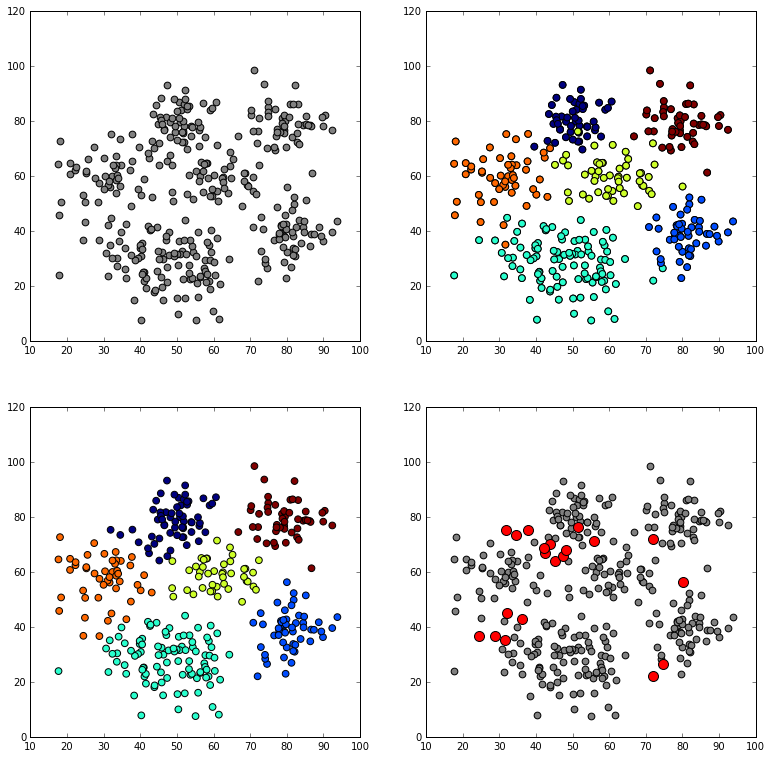

In [3]:
# Run KMeans
kmeans = KMeans(n_clusters=len(distros))
labels = kmeans.fit_predict(points)

# Match targets to labels
targets =  relabel(targets, labels)

# Separate correct from incorrect points
correct = np.vstack([points[i] for i, target in enumerate(targets) if target == labels[i]])
if len(targets) != len(correct):
    incorrect = np.vstack([pt for pt in points if pt not in correct])
else:
    incorrect = None

# Plot
fig1.set_size_inches(13,13)
ax1.change_geometry(2,2,1)
ax2.change_geometry(2,2,2)
ax2.scatter(points[:,0], points[:,1], s=45, c=targets)

ax3 = fig1.add_subplot(223)
ax3.scatter(points[:,0], points[:,1], s=45, c=labels)

ax4 = fig1.add_subplot(224)
ax4.scatter(correct[:,0], correct[:,1], s=45, c='grey')
if incorrect is not None:
    ax4.scatter(incorrect[:,0], incorrect[:,1], s=100, c='red')

display.display(fig1)

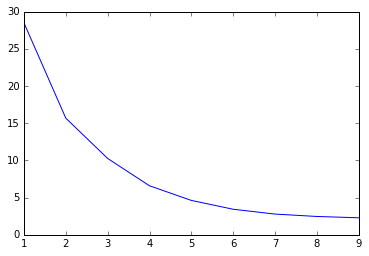

In [4]:
inertias = []
range_ = range(1,10)
for i in range_:
    kmeans.n_clusters = i
    kmeans.fit(points)
    inertias.append(kmeans.inertia_ / 10000.0)
plt.plot(range_, inertias)
plt.show()

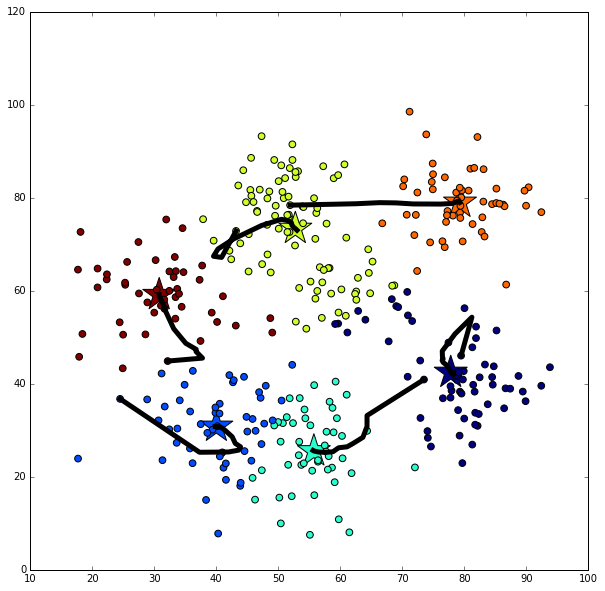

In [5]:
norms = np.einsum('ij,ij->i', points, points)
kmeans.n_clusters = len(distros)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
sct1 = ax1.scatter(points[:,0], points[:,1], s=45, c='grey')

centers = _init_centroids(points, kmeans.n_clusters, 'random')
all_centers = np.array(centers)
sct2 = ax1.scatter(centers[:,0], centers[:,1], s=1200, c=np.unique(targets), marker='*')

display.display(plt.gcf())
raw_input('')

while True:

    labels, _ = _labels_inertia(points, norms, centers)
    sct1.remove()
    sct1 = ax1.scatter(points[:,0], points[:,1], s=45, c=labels)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    raw_input('')
    
    new_centers = _centers_dense(points, labels, kmeans.n_clusters, None)
    all_centers = np.concatenate((all_centers, new_centers), axis=1)
    
    diff = new_centers - centers
    if np.dot(np.ravel(diff), np.ravel(diff)) < 1:
        break
    centers = new_centers

    sct2.remove()
    sct2 = ax1.scatter(centers[:,0], centers[:,1], s=1200, c=np.unique(targets), marker='*')

    display.clear_output(wait=True)
    display.display(plt.gcf())
    raw_input('')

center_x = all_centers[:,0::2].T
center_y = all_centers[:,1::2].T
ax1.plot(center_x, center_y, linewidth=5, c='black')
raw_input('')
display.clear_output(wait=True)